# Model training

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
categorical_features = df.select_dtypes(include="object").columns.to_list()
numerical_features = df.select_dtypes(exclude="object").columns.to_list()

print("Categorical:", categorical_features)
print("Numerical:", numerical_features)

Categorical: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numerical: ['math_score', 'reading_score', 'writing_score']


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("math_score", axis=1)
y = df['math_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X.shape

(1000, 7)

In [8]:
X_train.shape

(750, 7)

In [9]:
X_train.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [10]:
cols = list(X_train.columns)

numerical_col = []
categorical_col = []

for feature in cols:
    if feature in categorical_features:
        categorical_col.append(cols.index(feature))
    else:
        numerical_col.append(cols.index(feature))

In [11]:
numerical_col

[5, 6]

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_col),
    ('scaler', StandardScaler(), numerical_col)
])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [13]:
X_train

array([[ 0.        ,  1.        ,  1.        , ...,  0.        ,
        -1.59453623, -0.98844821],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.8575186 ,  0.62886547],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.33347946, -0.51673172],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.54365559, -1.05583628],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.52447752, -1.05583628],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.48804699,  1.37013424]])

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = [
    ("linear", LinearRegression()),
    ("ridge", Ridge()),
    ("lasso", Lasso()),
    ("decision", DecisionTreeRegressor()),
    ("random", RandomForestRegressor()),
    ("adaboost", AdaBoostRegressor()),
    ("gradient", GradientBoostingRegressor()),
    ("svr", SVR()),
]

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate_model(t):
    print("=" * 30)
    print("Model:", t[0])
    model = t[1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    
    print("R2:", r2)
    print("MAE:", mae)
    print("MSE:", mse)
    print("=" * 30)
    print('\n')
    return (r2, mae, mse)

In [22]:
entries = []

for t in models:
    entries.append((t[0], *evaluate_model(t)))

performance = pd.DataFrame(entries, columns=["Model", "R2", "MAE", "MSE"])
performance.sort_values(by="R2", ascending=False, inplace=True)

performance

Model: linear
R2: 0.8778243107659012
MAE: 4.337930600167408
MSE: 30.058114626720403


Model: ridge
R2: 0.8779832330998446
MAE: 4.335450652439719
MSE: 30.0190159667467


Model: lasso
R2: 0.8202480287428799
MAE: 5.218411335948426
MSE: 44.22324433196245


Model: decision
R2: 0.7613888379272215
MAE: 6.016
MSE: 58.704


Model: random
R2: 0.8492104437145129
MAE: 4.695453333333334
MSE: 37.097803955555555


Model: adaboost
R2: 0.8383522600120408
MAE: 4.852309378763268
MSE: 39.76917444188473


Model: gradient
R2: 0.8733778255377189
MAE: 4.3749443884069965
MSE: 31.15205535676721


Model: svr
R2: 0.7243845188119464
MAE: 5.589548575227139
MSE: 67.8079393567034




,Model,R2,MAE,MSE
1,ridge,0.877983,4.335451,30.019016
0,linear,0.877824,4.337931,30.058115
6,gradient,0.873378,4.374944,31.152055
4,random,0.849210,4.695453,37.097804
5,adaboost,0.838352,4.852309,39.769174
2,lasso,0.820248,5.218411,44.223244
3,decision,0.761389,6.016000,58.704000
7,svr,0.724385,5.589549,67.807939


## Here linear and Ridge have almost same performance.
## So we will take linear for simplicity

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [25]:
y_pred = model.predict(X_test)

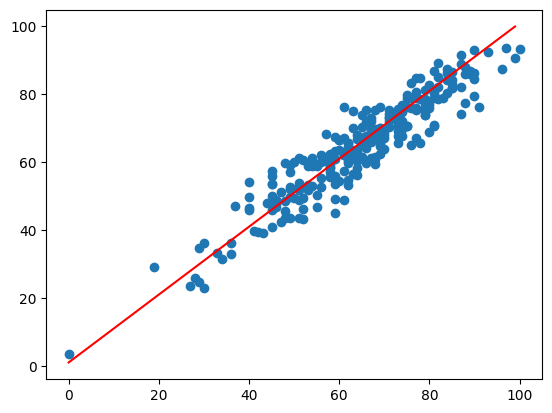

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot(np.arange(1, 101), color="red")

In [29]:
r2 = r2_score(y_test, y_pred)

In [30]:
print("R2 score:", r2)

R2 score: 0.8778243107659012
